# Mateusz Cedro - HM1
###  Brain Stroke Dataset

In [1]:
#pip install imbalanced-learn

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import imblearn
from imblearn.over_sampling import SMOTE

In [88]:
import xgboost as xgb

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
path = r'C:\Users\Mateusz\Documents\Studia nauka\ML MIM\xai_mim\brain_stroke.csv'
df = pd.read_csv(path)

In [7]:
# Data preview
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [8]:
df.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.00,4981.00,4981.00,4981.00,4981.00,4981.00
mean,43.42,0.10,0.06,105.94,28.50,0.05
std,22.66,0.29,0.23,45.08,6.79,0.22
min,0.08,0.00,0.00,55.12,14.00,0.00
25%,25.00,0.00,0.00,77.23,23.70,0.00
50%,45.00,0.00,0.00,91.85,28.10,0.00
75%,61.00,0.00,0.00,113.86,32.60,0.00
max,82.00,1.00,1.00,271.74,48.90,1.00


In [9]:
# Null check
df.isnull().all()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [10]:
# Data type check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [12]:
df_cat = df[['gender','ever_married','work_type','Residence_type','smoking_status']]

df_num = df[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]

# Printing unique values for categorical data
print(df_cat['gender'].unique())
print(df_cat['ever_married'].unique())
print(df_cat['work_type'].unique())
print(df_cat['Residence_type'].unique())
print(df_cat['smoking_status'].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [13]:
# Data manipulation
df_cat = pd.get_dummies(df_cat, drop_first = True)
df1 = pd.concat([df_cat, df_num], axis=1)
df1.head()

,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,1,0,0,1,1,0,0,67.0,0,1,228.69,36.6,1
1,1,1,1,0,0,0,0,1,0,80.0,0,1,105.92,32.5,1
2,0,1,1,0,0,1,0,0,1,49.0,0,0,171.23,34.4,1
3,0,1,0,1,0,0,0,1,0,79.0,1,0,174.12,24.0,1
4,1,1,1,0,0,1,1,0,0,81.0,0,0,186.21,29.0,1


In [14]:
df1.drop_duplicates().tail()

,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
4976,1,0,1,0,0,0,1,0,0,41.0,0,0,70.15,29.8,0
4977,1,1,1,0,0,1,0,0,1,40.0,0,0,191.15,31.1,0
4978,0,1,0,0,0,0,0,0,1,45.0,1,0,95.02,31.8,0
4979,1,1,1,0,0,0,0,0,1,40.0,0,0,83.94,30.0,0
4980,0,1,1,0,0,1,0,1,0,80.0,1,0,83.75,29.1,0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender_Male                     4981 non-null   uint8  
 1   ever_married_Yes                4981 non-null   uint8  
 2   work_type_Private               4981 non-null   uint8  
 3   work_type_Self-employed         4981 non-null   uint8  
 4   work_type_children              4981 non-null   uint8  
 5   Residence_type_Urban            4981 non-null   uint8  
 6   smoking_status_formerly smoked  4981 non-null   uint8  
 7   smoking_status_never smoked     4981 non-null   uint8  
 8   smoking_status_smokes           4981 non-null   uint8  
 9   age                             4981 non-null   float64
 10  hypertension                    4981 non-null   int64  
 11  heart_disease                   4981 non-null   int64  
 12  avg_glucose_level               49

### Basic EDA

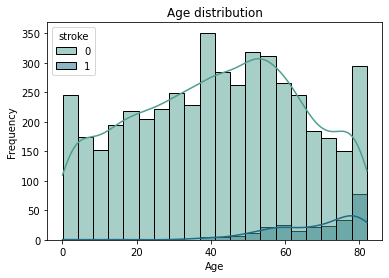

In [17]:
sns.histplot(data=df,x='age',
             kde=True,
             hue='stroke',
             palette='crest')

plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can see that within ages, the stroke occurance tends to arise

In [19]:
# Let's check how the stroke issue is spread among genders
df.groupby('gender').agg({'gender': 'count', 'age': 'mean', 'stroke':'sum'})

,gender,age,stroke
gender,,,
Female,2907,43.927816,140
Male,2074,42.707888,108


We have unequal spread of Male (40%) and Female (60%), however, the spread of stroke cases is rather equal: 4,81% Female, 5,21% Male

In [20]:
for col in ['gender','ever_married','work_type','Residence_type','smoking_status']:
    df[col] = df[col].astype('category')

In [21]:
df.groupby('smoking_status').agg({'smoking_status': 'count','stroke':'sum'})

,smoking_status,stroke
smoking_status,,
Unknown,1500,47
formerly smoked,867,70
never smoked,1838,89
smokes,776,42


In [22]:
df.groupby('stroke').agg({'stroke': 'count'})

,stroke
stroke,
0,4733
1,248


Highly imbalanced data, thus,
SMOTE will be used to balance the dataset in terms of stroke observations

## Data split

In [67]:
X, y = df1.iloc[:,:-1], df1.iloc[:,-1]

In [24]:
y.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

In [26]:
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3984, 14)
Number transactions y_train dataset:  (3984,)
Number transactions X_test dataset:  (997, 14)
Number transactions y_test dataset:  (997,)


In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
sm = SMOTE(random_state = 77)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3789 

After OverSampling, the shape of train_X: (7578, 14)
After OverSampling, the shape of train_y: (7578,) 

After OverSampling, counts of label '1': 3789
After OverSampling, counts of label '0': 3789


After Smote upsampling implementation we have equal split of the stroke cases

## XGBoost classification model

Firstly, without upsampling

In [28]:
xg_cl = xgb.XGBClassifier(objective ='binary:logistic', n_estimators = 100, seed = 77)
eval_set = [(X_train, y_train), (X_test, y_test)]

In [29]:
xg_cl.fit(X_train, y_train, eval_metric = 'error', eval_set = eval_set, verbose = True)
results = xg_cl.evals_result()

C:\Users\Mateusz\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.04443	validation_1-error:0.05817
[1]	validation_0-error:0.04543	validation_1-error:0.06018
[2]	validation_0-error:0.04518	validation_1-error:0.05717
[3]	validation_0-error:0.04418	validation_1-error:0.05416
[4]	validation_0-error:0.04493	validation_1-error:0.05416
[5]	validation_0-error:0.04468	validation_1-error:0.05517
[6]	validation_0-error:0.04393	validation_1-error:0.05517
[7]	validation_0-error:0.04342	validation_1-error:0.05617
[8]	validation_0-error:0.04342	validation_1-error:0.05617
[9]	validation_0-error:0.04242	validation_1-error:0.05717
[10]	validation_0-error:0.04167	validation_1-error:0.05717
[11]	validation_0-error:0.04192	validation_1-error:0.05717
[12]	validation_0-error:0.04192	validation_1-error:0.05717
[13]	validation_0-error:0.04167	validation_1-error:0.05617
[14]	validation_0-error:0.04091	validation_1-error:0.05517
[15]	validation_0-error:0.04091	validation_1-error:0.05517
[16]	validation_0-error:0.04091	validation_1-error:0.05517
[17]	va

In [33]:
predictions = xg_cl.predict(X_test)

In [34]:
accuracy = float(np.sum(predictions == y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy*100))

accuracy: 93.781344


In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       944
           1       0.15      0.04      0.06        53

    accuracy                           0.94       997
   macro avg       0.55      0.51      0.51       997
weighted avg       0.91      0.94      0.92       997



In [95]:
cf_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))

[[933  11]
 [ 51   2]]


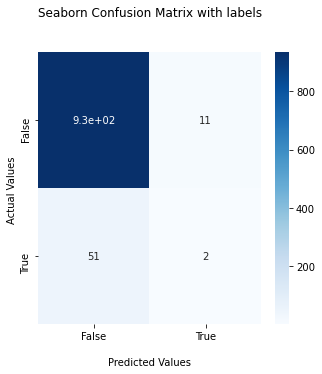

In [94]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

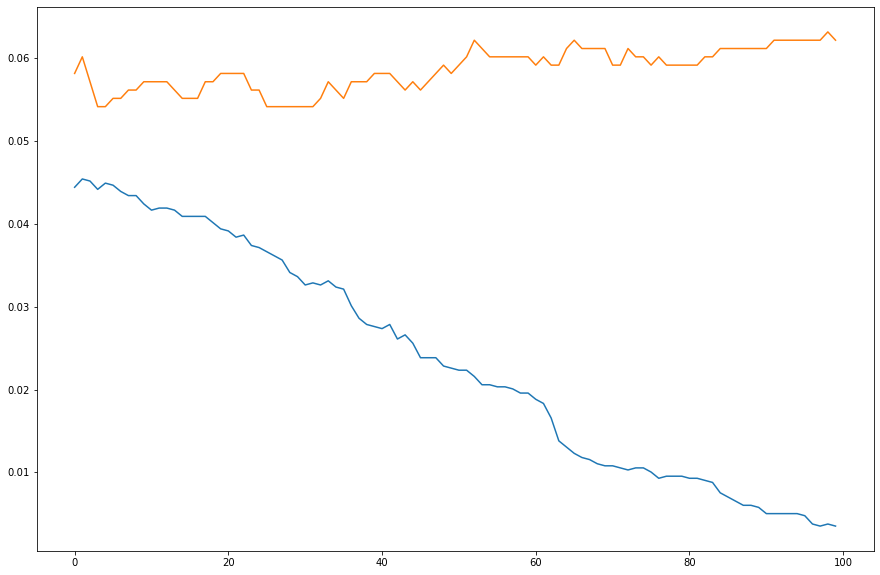

In [57]:
# plot classification error
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label = 'Train') # blue
ax.plot(x_axis, results['validation_1']['error'], label = 'Test') # orange

We can see that the train error metrics decreases every another step (blue line), and the test error metrics drifts along the same level (0.06)

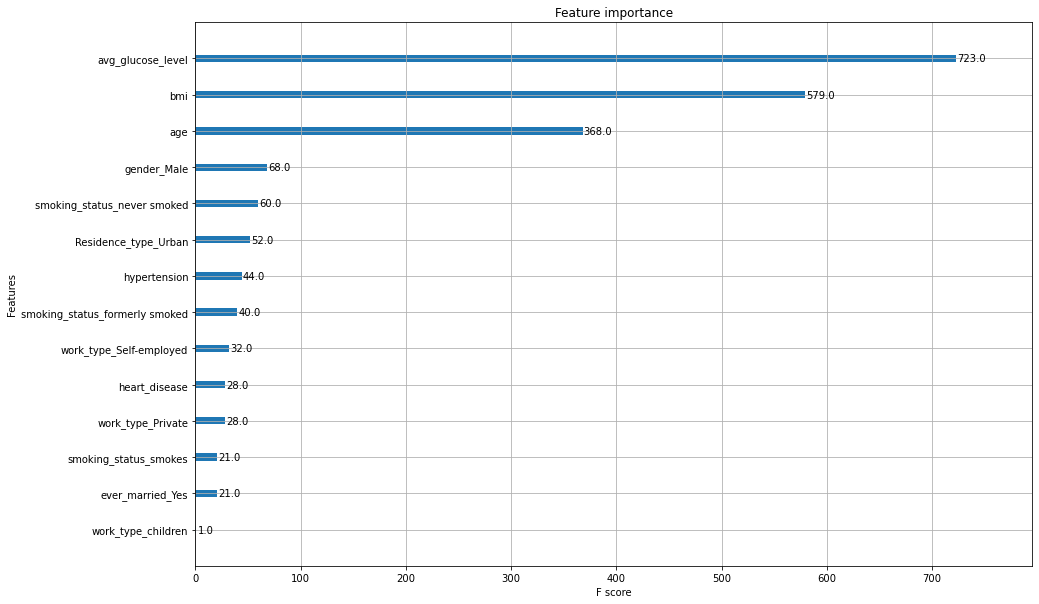

In [58]:
xgb.plot_importance(xg_cl)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

The feagure importance shows that the avg_glucose_level, bmi index, and age are affecting the most important for explaining the variance of the stroke cases. The least impotant are work_type_children, ecver_married_Yes, and smoking_status_smokers.

## More balanced data - SMOTE

Now I will check wether the resampling of the dataset will imporve the accuracy of the calssification model

In [49]:
xg_cl_smote = xgb.XGBClassifier(objective ='binary:logistic', n_estimators = 100, seed = 77)
eval_set = [(X_train_res, y_train_res), (X_test, y_test)]

In [50]:
xg_cl_smote.fit(X_train_res, y_train_res, eval_metric = 'error', eval_set = eval_set, verbose = True)
results_smote = xg_cl_smote.evals_result()

[0]	validation_0-error:0.12827	validation_1-error:0.16449
[1]	validation_0-error:0.10676	validation_1-error:0.14644
[2]	validation_0-error:0.09976	validation_1-error:0.16550
[3]	validation_0-error:0.09184	validation_1-error:0.15346
[4]	validation_0-error:0.09198	validation_1-error:0.14845
[5]	validation_0-error:0.08577	validation_1-error:0.14544
[6]	validation_0-error:0.08116	validation_1-error:0.14443
[7]	validation_0-error:0.07759	validation_1-error:0.13842
[8]	validation_0-error:0.07258	validation_1-error:0.13842
[9]	validation_0-error:0.07086	validation_1-error:0.13641
[10]	validation_0-error:0.06413	validation_1-error:0.13641
[11]	validation_0-error:0.06374	validation_1-error:0.13641
[12]	validation_0-error:0.06136	validation_1-error:0.13139
[13]	validation_0-error:0.05991	validation_1-error:0.12337
[14]	validation_0-error:0.05846	validation_1-error:0.12136
[15]	validation_0-error:0.05186	validation_1-error:0.12638
[16]	validation_0-error:0.04605	validation_1-error:0.12638


C:\Users\Mateusz\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-error:0.04368	validation_1-error:0.12136
[18]	validation_0-error:0.04157	validation_1-error:0.12036
[19]	validation_0-error:0.04025	validation_1-error:0.11836
[20]	validation_0-error:0.03800	validation_1-error:0.11434
[21]	validation_0-error:0.03708	validation_1-error:0.11234
[22]	validation_0-error:0.03708	validation_1-error:0.11133
[23]	validation_0-error:0.03669	validation_1-error:0.11133
[24]	validation_0-error:0.03563	validation_1-error:0.10832
[25]	validation_0-error:0.03510	validation_1-error:0.10732
[26]	validation_0-error:0.03523	validation_1-error:0.10532
[27]	validation_0-error:0.03378	validation_1-error:0.10331
[28]	validation_0-error:0.03352	validation_1-error:0.10331
[29]	validation_0-error:0.03233	validation_1-error:0.10331
[30]	validation_0-error:0.03141	validation_1-error:0.10030
[31]	validation_0-error:0.03088	validation_1-error:0.10030
[32]	validation_0-error:0.03088	validation_1-error:0.10130
[33]	validation_0-error:0.03022	validation_1-error:0.102

In [51]:
predictions_smote = xg_cl_smote.predict(X_test)

In [52]:
accuracy = float(np.sum(predictions_smote == y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy*100))

accuracy: 91.574724


We can see the poorer performance of the resampled model, which may suggest that the pervious model was overfitted

In [84]:
print(classification_report(y_test, predictions_smote))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       944
           1       0.20      0.19      0.19        53

    accuracy                           0.92       997
   macro avg       0.58      0.57      0.57       997
weighted avg       0.91      0.92      0.91       997



In [98]:
cf_matrix_smote = confusion_matrix(y_test, predictions_smote)
print(confusion_matrix(y_test, predictions_smote))

[[903  41]
 [ 43  10]]


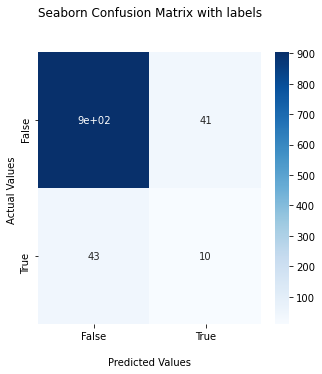

In [99]:
ax = sns.heatmap(cf_matrix_smote, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

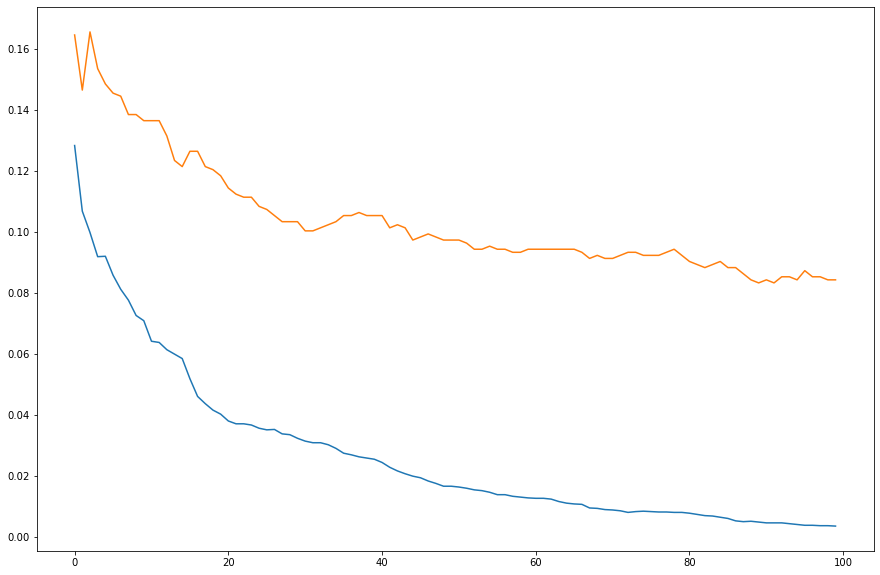

In [53]:
# plot classification error
epochs = len(results_smote['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results_smote['validation_0']['error'], label = 'Train')
ax.plot(x_axis, results_smote['validation_1']['error'], label = 'Test')

In [54]:
import graphviz

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

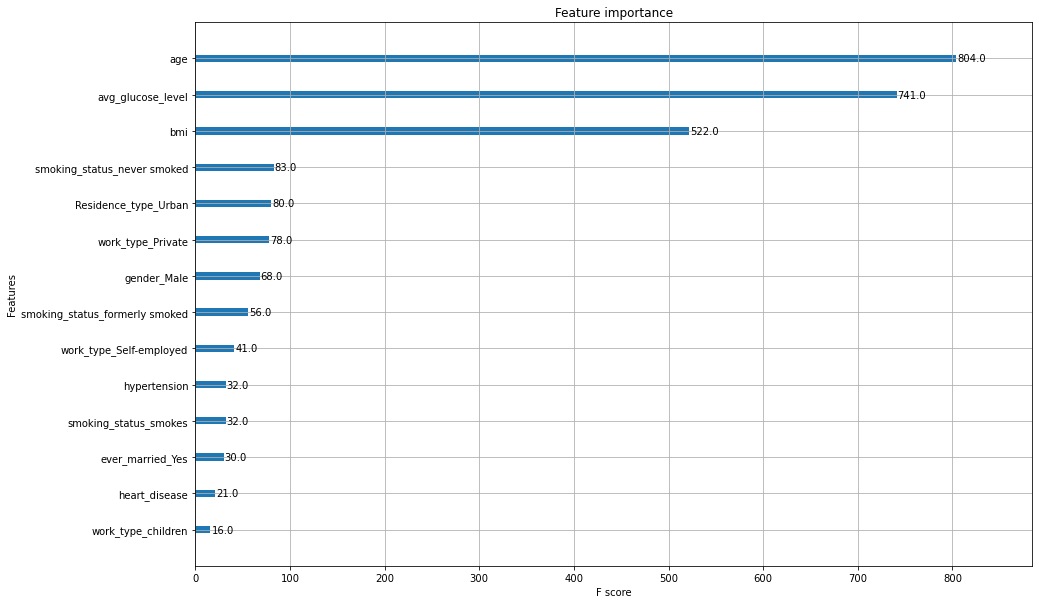

In [60]:
xgb.plot_importance(xg_cl_smote)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

Resampled classification model shows us little bit different things: the most important are: age, avg_glucose_level, and bmi respectively. The least important are work_type_children, heart_disease, and ever_married_Yes

<AxesSubplot:>

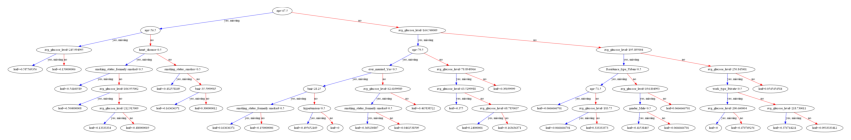

In [59]:
xgb.plot_tree(xg_cl, num_trees=0)

## Logistic reg, random forest

Now I will check how the logistic regression performs on this data

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [69]:
# Let's applay normalization 
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)

X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
accuracy = model.score(X_test, y_test)
print('accuracy: ', accuracy * 100, '%')

accuracy:  94.6840521564694 %


Quite high accuracy

In [75]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       944
           1       0.00      0.00      0.00        53

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997



C:\Users\Mateusz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mateusz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mateusz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Poor results: they may by caused by the imbalanced dataset. Let's try with balanced data

In [77]:
means_bal = np.mean(X_train_res, axis=0)
stds_bal = np.std(X_train_res, axis=0)

X_train_res = (X_train_res - means_bal)/stds_bal
X_test = (X_test - means_bal)/stds_bal

In [78]:
model_bal = LogisticRegression()
model_bal.fit(X_train_res, y_train_res)

LogisticRegression()

In [81]:
accuracy_bal = model_bal.score(X_test, y_test)
print('accuracy: ', accuracy_bal * 100, '%')

accuracy:  57.57271815446339 %


In [82]:
y_pred_bal = model_bal.predict(X_test)
print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.99      0.56      0.71       944
           1       0.10      0.92      0.19        53

    accuracy                           0.58       997
   macro avg       0.55      0.74      0.45       997
weighted avg       0.95      0.58      0.68       997



In [101]:
cf_matrix_log_bal = confusion_matrix(y_test, y_pred_bal)
print(confusion_matrix(y_test, y_pred_bal))

[[525 419]
 [  4  49]]


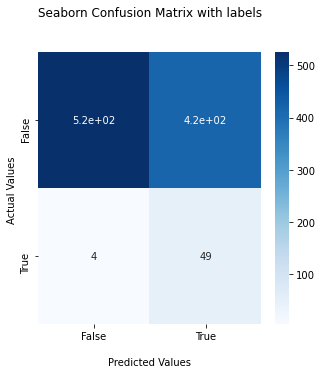

In [102]:
ax = sns.heatmap(cf_matrix_log_bal, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Final thoughts: On this dataset, XGBoost algorithm seems to perform much better than the logistic regression. Therefore, it can be inferred that the boosting the importance of truly important features play significant role in preforming such analysis.